In [57]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
stock = 'DIS'
data = yf.download(stock,'2010-01-01','2023-05-19')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,32.50,32.750000,31.870001,32.070000,27.933922,13700400
2010-01-05,32.07,32.160000,31.700001,31.990000,27.864239,10307700
2010-01-06,31.90,32.000000,31.680000,31.820000,27.716167,10709500
2010-01-07,31.77,31.860001,31.540001,31.830000,27.724873,8202100
2010-01-08,31.66,31.940001,31.530001,31.879999,27.768421,7657500


In [59]:
price = data['Close']
price

Date
2010-01-04    32.070000
2010-01-05    31.990000
2010-01-06    31.820000
2010-01-07    31.830000
2010-01-08    31.879999
                ...    
2023-05-12    91.989998
2023-05-15    92.860001
2023-05-16    90.980003
2023-05-17    92.769997
2023-05-18    93.760002
Name: Close, Length: 3367, dtype: float64

<Axes: xlabel='Date'>

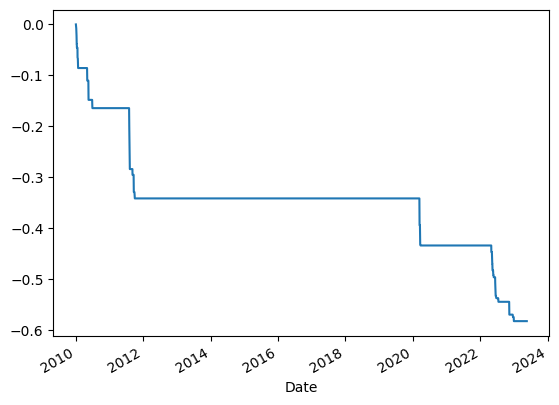

In [60]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()

In [61]:
print(f"Maximum Drawdown for the given period is: {mdd[-1]*100} %")


Maximum Drawdown for the given period is: -58.313111464352495 %


In [62]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        , -0.00249454, -0.00531416, ..., -0.0202455 ,
        0.01967458,  0.01067161])

In [63]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 0.99750546, 0.99220455, ..., 2.83691937, 2.89273457,
       2.92360471])

In [64]:
print(f"Cumulative return of stock is {cumulative_ret[-1]*100}%")

Cumulative return of stock is 292.36047093372036%


In [65]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2010-12-31         NaN
2011-12-31   -0.000267
2012-12-31    0.327733
2013-12-31    0.534445
2014-12-31    0.232853
2015-12-31    0.115617
2016-12-31   -0.008184
2017-12-31    0.031568
2018-12-31    0.019905
2019-12-31    0.319015
2020-12-31    0.252714
2021-12-31   -0.145104
2022-12-31   -0.439086
2023-12-31    0.079190
Freq: A-DEC, Name: Close, dtype: float64

In [66]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2010-01-31         NaN
2010-02-28    0.057191
2010-03-31    0.117478
2010-04-30    0.055285
2010-05-31   -0.092834
                ...   
2023-01-31    0.248734
2023-02-28   -0.081851
2023-03-31    0.005220
2023-04-30    0.023669
2023-05-31   -0.085268
Freq: M, Name: Close, Length: 161, dtype: float64

In [67]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : 10.156918542119028%


In [68]:
sharpe_ratio = (avg_yearly_return - 0.07)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : 4.193174134925728


In [69]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2010-05-31   -0.092834
2010-06-30   -0.057451
2010-08-31   -0.034135
2011-03-31   -0.014861
2011-05-31   -0.034107
                ...   
2022-09-30   -0.158369
2022-11-30   -0.081378
2022-12-31   -0.112292
2023-02-28   -0.081851
2023-05-31   -0.085268
Name: Close, Length: 70, dtype: float64

In [70]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.07)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: 6.7259835474067895
